# Insertion Sort
## Sort function

In [1]:
import numpy as np
import time
import itertools
import matplotlib.pyplot as plt

In [83]:
def in_sort(A,aLen):
    for i in range(1,aLen):
        temp = A[i];
        j=i-1;
        while(temp<A[j] and j>=0):
            A[j+1]=A[j]
            j-=1
        A[j+1]=temp
    return A

#Modified version, returns steps and comparisons
def in_sort_Mod(A,aLen):
    #init counters
    steps,comps,swaps = 0,0,0
    t=np.zeros(aLen,dtype=int)
    i = 1
    while(i<aLen):
        temp = A[i]
        j=i-1
        while(True):
            comps+=1
            t[i]+=1
            if(j<0):break
            if(temp>=A[j]):break
            else:swaps+=1
            A[j+1]=A[j]
            j-=1;steps+=3
        A[j+1]=temp;steps+=1;
        i+=1;steps+=4
    steps+=1
    return A,steps,comps,swaps,t

Here we test the function:

In [3]:
A = np.array([0,5,1,3,4,7,9])
print('A > ',A)
print('ordered A > ',in_sort(A,len(A)))

A >  [0 5 1 3 4 7 9]
ordered A >  [0 1 3 4 5 7 9]


## Steps distribution

In [100]:
#Generate all permutations of n
n = 3
perm = np.array(list(itertools.permutations(range(n))))
n_perm = len(perm)

In [101]:
pasos = np.empty(n_perm)
comparaciones = np.empty(n_perm)
sw = np.empty(n_perm)
t_loop=np.empty([n_perm,n])
for i in range (n_perm):
    tm = perm[i]
    A,steps,comps,swaps,t = in_sort_Mod(tm,n)
    pasos[i]=steps
    comparaciones[i]=comps
    sw[i]=swaps
    t_loop[i] = t

In the histogram we can see the number of steps taken by in_sort(), and the average time for any permutation

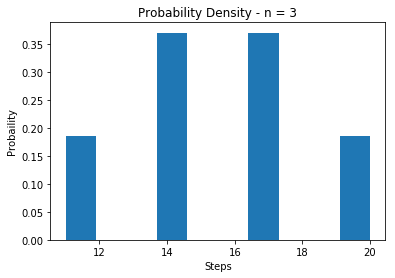

Distribution
P(11.0) =  0.185185185185
P(12.0) =  0.0
P(13.0) =  0.0
P(14.0) =  0.37037037037
P(15.0) =  0.0
P(16.0) =  0.0
P(17.0) =  0.37037037037
P(18.0) =  0.0
P(19.0) =  0.0
P(20.0) =  0.185185185185
Average >  15.5


In [102]:
counts, bins, bars=plt.hist(pasos, normed=1)
plt.title("Probability Density - n = "+str(n))
plt.xlabel('Steps')
plt.ylabel('Probaility')
plt.show()

#raw data
pasosProb = pasos/np.linalg.norm(pasos,1)
print("Distribution")
for i in range(len(bins)-1):
    print("P("+str(i+pasos[0])+") = ",counts[i])
print("Average > ",np.average(pasos))

And for the number of comparisons performed:

In [103]:
t_norm = np.empty(n_perm)
print ("[",end=' ')
for i in range(n): print('t'+str(i),end=' ')
print ("]")
for i in range(n_perm):
    print ("perm"+ str(perm[i]) +">",t_loop[i])

[ t0 t1 t2 ]
perm[0 1 2]> [ 0.  1.  1.]
perm[0 1 2]> [ 0.  1.  2.]
perm[0 1 2]> [ 0.  2.  1.]
perm[0 1 2]> [ 0.  1.  3.]
perm[0 1 2]> [ 0.  2.  2.]
perm[0 1 2]> [ 0.  2.  3.]
